<a href="https://colab.research.google.com/github/insanudin16/NLP_Task/blob/main/NLP_Analsisi_Sentimen_Pemecatan_STY_Skip_GramVektor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests beautifulsoup4 pandas

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import csv
from datetime import datetime
import time
import random

def get_headers():
    """
    Return randomized headers to avoid detection
    """
    user_agents = [
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:89.0) Gecko/20100101 Firefox/89.0',
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.1 Safari/605.1.15'
    ]

    return {
        'User-Agent': random.choice(user_agents),
        'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8',
        'Accept-Language': 'en-US,en;q=0.5',
        'DNT': '1',
        'Connection': 'keep-alive',
        'Upgrade-Insecure-Requests': '1',
    }

def scrape_tempo(url):
    """
    Scrape article from Tempo
    """
    try:
        response = requests.get(url, headers=get_headers(), timeout=10)
        response.raise_for_status()  # Raise an exception for bad status codes
        soup = BeautifulSoup(response.content, 'html.parser')

        # Get title (trying multiple possible class names)
        title = None
        title_candidates = [
            soup.find('h1', class_='title'),
            soup.find('h1', class_='detail-title'),
            soup.find('h1', class_='read__title'),
            soup.find('h1')  # Fallback to any h1
        ]
        for candidate in title_candidates:
            if candidate:
                title = candidate.text.strip()
                break

        # Get content (trying multiple possible class names)
        content = ''
        content_candidates = [
            soup.find('div', class_='detail-konten'),
            soup.find('div', class_='detail-in'),
            soup.find('div', class_='read__content'),
            soup.find('article')  # Fallback to article tag
        ]
        for content_div in content_candidates:
            if content_div:
                paragraphs = content_div.find_all(['p', 'div'], class_=lambda x: x != 'ads-on-body')
                content = ' '.join([p.text.strip() for p in paragraphs if p.text.strip()])
                break

        if title and content:
            return 'Tempo', title, content
        else:
            print(f"Failed to extract content from Tempo article: {url}")
            return 'Tempo', '', ''

    except Exception as e:
        print(f"Error scraping Tempo article: {e}")
        return 'Tempo', '', ''

def scrape_bola(url):
    """
    Scrape article from Bola.com
    """
    try:
        response = requests.get(url, headers=get_headers(), timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Get title
        title = None
        title_candidates = [
            soup.find('h1', class_='read__title'),
            soup.find('h1', class_='detail-title'),
            soup.find('h1')
        ]
        for candidate in title_candidates:
            if candidate:
                title = candidate.text.strip()
                break

        # Get content
        content = ''
        content_candidates = [
            soup.find('div', class_='read__content'),
            soup.find('div', class_='article-raw-content'),
            soup.find('article')
        ]
        for content_div in content_candidates:
            if content_div:
                paragraphs = content_div.find_all(['p', 'div'], class_=lambda x: x != 'ads-inside-article')
                content = ' '.join([p.text.strip() for p in paragraphs if p.text.strip()])
                break

        if title and content:
            return 'Bola.com', title, content
        else:
            print(f"Failed to extract content from Bola.com article: {url}")
            return 'Bola.com', '', ''

    except Exception as e:
        print(f"Error scraping Bola.com article: {e}")
        return 'Bola.com', '', ''

def scrape_bolasport(url):
    """
    Scrape article from Bolasport.com
    """
    try:
        response = requests.get(url, headers=get_headers(), timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Get title
        title = None
        title_candidates = [
            soup.find('h1', class_='read__title'),
            soup.find('h1', class_='detail-title'),
            soup.find('h1')
        ]
        for candidate in title_candidates:
            if candidate:
                title = candidate.text.strip()
                break

        # Get content
        content = ''
        content_candidates = [
            soup.find('div', class_='read__content'),
            soup.find('div', class_='article-content-body__item-content'),
            soup.find('article')
        ]
        for content_div in content_candidates:
            if content_div:
                paragraphs = content_div.find_all(['p', 'div'], class_=lambda x: x != 'ads-in-article')
                content = ' '.join([p.text.strip() for p in paragraphs if p.text.strip()])
                break

        if title and content:
            return 'Bolasport', title, content
        else:
            print(f"Failed to extract content from Bolasport article: {url}")
            return 'Bolasport', '', ''

    except Exception as e:
        print(f"Error scraping Bolasport article: {e}")
        return 'Bolasport', '', ''

def scrape_kumparan(url):
    """
    Scrape article from Kumparan
    """
    try:
        response = requests.get(url, headers=get_headers(), timeout=10)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Get title
        title = None
        title_candidates = [
            soup.find('h1', class_='PostTitle'),
            soup.find('h1', class_='title'),
            soup.find('h1', class_='read__title'),
            soup.find('h1')
        ]
        for candidate in title_candidates:
            if candidate:
                title = candidate.text.strip()
                break

        # Get content
        content = ''
        content_candidates = [
            soup.find('div', class_='PostBody'),
            soup.find('div', class_='detail-content'),
            soup.find('div', class_='ReadArticle')
        ]
        for content_div in content_candidates:
            if content_div:
                paragraphs = content_div.find_all(['p', 'div'], class_=lambda x: x != 'ads')
                content = ' '.join([p.text.strip() for p in paragraphs if p.text.strip()])
                break

        if title and content:
            return 'Kumparan', title, content
        else:
            print(f"Failed to extract content from Kumparan article: {url}")
            return 'Kumparan', '', ''

    except Exception as e:
        print(f"Error scraping Kumparan article: {e}")
        return 'Kumparan', '', ''

# ... [Previous kompas and detik functions remain the same] ...

def main(urls):
    """
    Main function to scrape articles
    """
    data = []

    for url in urls:
        print(f"\nScraping: {url}")
        # Random delay between 2 and 4 seconds
        time.sleep(random.uniform(2, 4))

        try:
            if 'tempo.co' in url:
                result = scrape_tempo(url)
            elif 'bola.com' in url:
                result = scrape_bola(url)
            elif 'bolasport.com' in url:
                result = scrape_bolasport(url)
            elif 'kumparan.com' in url:
                result = scrape_kumparan(url)
            elif 'kompas.com' in url:
                result = scrape_kompas(url)
            elif 'detik.com' in url:
                result = scrape_detik(url)
            else:
                print(f"Unsupported website: {url}")
                continue

            if result[1]:  # If title is not empty
                data.append(result)
                print(f"Successfully scraped article from {result[0]}")
                print(f"Title: {result[1][:100]}...")  # Print first 100 chars of title
            else:
                print(f"Failed to scrape article")

        except Exception as e:
            print(f"Unexpected error while scraping {url}: {e}")
            continue

    if data:
        save_to_csv(data)
        print(f"\nSuccessfully scraped {len(data)} articles")
    else:
        print("\nNo articles were successfully scraped")

# URLs remain the same as before...
urls = [
    "https://www.tempo.co/sepakbola/shin-tae-yong-buka-suara-soal-proses-pemecatannya-sebagai-pelatih-timnas-indonesia-oleh-pssi-1194894",
    "https://www.bola.com/indonesia/read/5883347/shin-tae-yong-ceritakan-kronologi-pemecatan-dirinya-oleh-pssi-sangat-mendadak",
    "https://www.bolasport.com/read/314205641/menyedihkan-shin-tae-yong-buka-bukaan-usai-dipecat-dari-timnas-indonesia-didepak-dua-jam-dari-pengumuman-resmi",
    "https://kumparan.com/kumparanbola/resmi-shin-tae-yong-dipecat-dari-kursi-pelatih-timnas-indonesia-24FRhH3IHsV/full",
    "https://www.kompas.com/tren/read/2025/01/07/110000965/kronologi-shin-tae-yong-dipecat-usai-5-tahun-latih-timnas-pssi-singgung",
    "https://www.tempo.co/sepakbola/di-balik-keputusan-pemecatan-shin-tae-yong-dari-kursi-pelatih-timnas-indonesia-1190840",
    "https://www.detik.com/jateng/sepakbola/d-7719827/blak-blakan-erick-thohir-ungkap-alasan-pemecatan-shin-tae-yong"
]

if __name__ == "__main__":
    main(urls)


Scraping: https://www.tempo.co/sepakbola/shin-tae-yong-buka-suara-soal-proses-pemecatannya-sebagai-pelatih-timnas-indonesia-oleh-pssi-1194894
Successfully scraped article from Tempo
Title: Shin Tae-yong Buka Suara soal Proses Pemecatannya sebagai Pelatih Timnas Indonesia oleh PSSI...

Scraping: https://www.bola.com/indonesia/read/5883347/shin-tae-yong-ceritakan-kronologi-pemecatan-dirinya-oleh-pssi-sangat-mendadak
Successfully scraped article from Bola.com
Title: Shin Tae-yong Ceritakan Kronologi Pemecatan Dirinya oleh PSSI: Sangat Mendadak...

Scraping: https://www.bolasport.com/read/314205641/menyedihkan-shin-tae-yong-buka-bukaan-usai-dipecat-dari-timnas-indonesia-didepak-dua-jam-dari-pengumuman-resmi
Error scraping Bolasport article: 403 Client Error: Forbidden for url: https://www.bolasport.com/read/314205641/menyedihkan-shin-tae-yong-buka-bukaan-usai-dipecat-dari-timnas-indonesia-didepak-dua-jam-dari-pengumuman-resmi
Failed to scrape article

Scraping: https://kumparan.com/kumpar

In [ ]:
pip install pandas wordcloud matplotlib scikit-learn

In [ ]:
import numpy as np
from collections import defaultdict
import re
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK resources
nltk.download('punkt_tab')
nltk.download('stopwords')

# Fungsi untuk preprocessing text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('indonesian'))
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [token for token in tokens if len(token) > 2]
    return tokens

# Fungsi untuk membuat pasangan kata untuk skip-gram
def create_skip_gram_pairs(tokens, window_size=2):
    pairs = []
    for i, center_word in enumerate(tokens):
        window_start = max(0, i - window_size)
        window_end = min(len(tokens), i + window_size + 1)
        context_words = tokens[window_start:i] + tokens[window_end:window_end]
        for context_word in context_words:
            pairs.append((center_word, context_word))
    return pairs

# Fungsi untuk membuat dictionary vector kata sederhana
def create_word_vector_dict(pairs, vector_size=100):
    vocab = list(set([word for pair in pairs for word in pair]))
    word_to_vec = {}
    for word in vocab:
        word_to_vec[word] = np.random.rand(vector_size)
    return word_to_vec

# Fungsi untuk menghitung cosine similarity
def calculate_cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Fungsi untuk mencari kata yang mirip
def find_similar_words(target_word, word_vectors, n=5):
    if target_word not in word_vectors:
        return []
    similarities = []
    target_vector = word_vectors[target_word]
    for word, vector in word_vectors.items():
        if word != target_word:
            similarity = calculate_cosine_similarity(target_vector, vector)
            similarities.append((word, similarity))
    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:n]

# Membaca file CSV
file_path = 'sty_articles.csv'  # Ganti dengan path file Anda
df = pd.read_csv(file_path)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Beberapa hasil preprocessing:
Artikel 1: ['perbesar', 'perbesar', 'baca', 'berita', 'iklan', 'klik', 'baca', 'berita', 'iklan', 'klik']
Artikel 2: ['shin', 'taeyong', 'ceritakan', 'kronologi', 'pemecatan', 'pssi', 'mendadakhery', 'kurniawandiperbarui', 'jan', 'wibditerbitkan']
Artikel 3: ['kompascom', 'pssi', 'memutuskan', 'memecat', 'shin', 'taeyong', 'posisinya', 'pelatih', 'timnas', 'indonesia']
Artikel 4: ['perbesar', 'perbesar', 'baca', 'berita', 'iklan', 'klik', 'baca', 'berita', 'iklan', 'klik']
Artikel 5: ['pssi', 'resmi', 'memecat', 'shin', 'taeyong', 'jabatan', 'pelatih', 'timnas', 'indonesia', 'ketua']


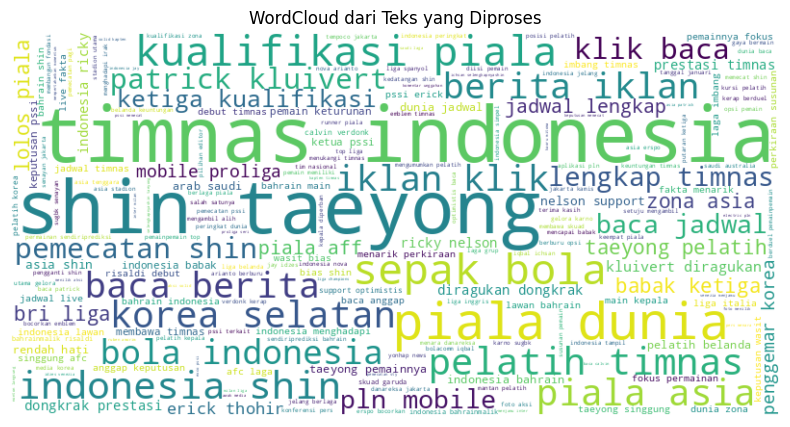

In [ ]:
# 1. Preprocessing
all_tokens = []
sample_preprocessed = []

for index, row in df.iterrows():
    tokens = preprocess_text(row['konten'])
    all_tokens.extend(tokens)
    if index < 5:  # Menampilkan 5 sampel hasil preprocessing
        sample_preprocessed.append(tokens)

# Menampilkan beberapa hasil preprocessing
print("Beberapa hasil preprocessing:")
for i, tokens in enumerate(sample_preprocessed):
    print(f"Artikel {i+1}: {tokens[:10]}")  # Menampilkan 10 token pertama dari setiap artikel

# Visualisasi WordCloud dari teks yang telah diproses
all_text = ' '.join(all_tokens)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Teks yang Diproses')
plt.show()

In [ ]:
import numpy as np
import pandas as pd

class EfficientSkipGramModel:
    def __init__(self, vocab_size, embedding_dim=50):
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.W1 = np.random.randn(vocab_size, embedding_dim) * 0.01
        self.W2 = np.random.randn(embedding_dim, vocab_size) * 0.01

    def forward(self, one_hot_vector):
        hidden_layer = np.dot(one_hot_vector, self.W1)
        output_layer = np.dot(hidden_layer, self.W2)
        output_layer = self._softmax(output_layer)
        return hidden_layer, output_layer

    def backward(self, one_hot_vector, target_vector, learning_rate=0.01):
        hidden_layer, output_layer = self.forward(one_hot_vector)
        error = target_vector - output_layer

        output_layer_gradient = np.outer(hidden_layer, error)
        hidden_layer_gradient = np.outer(one_hot_vector, np.dot(self.W2, error))

        self.W1 -= learning_rate * hidden_layer_gradient
        self.W2 -= learning_rate * output_layer_gradient

    def _softmax(self, x):
        exp_x = np.exp(x - np.max(x))
        return exp_x / exp_x.sum()

def create_skip_gram_pairs(tokens, window_size=1):
    pairs = []
    for i, center_word in enumerate(tokens):
        start = max(0, i - window_size)
        end = min(len(tokens), i + window_size + 1)
        context_words = tokens[start:i] + tokens[i+1:end]
        pairs.extend([(center_word, context_word) for context_word in context_words])
    return pairs

def train_skip_gram(file_path, embedding_dim=50, window_size=1, epochs=10, learning_rate=0.01):
    df = pd.read_csv(file_path)

    all_tokens = []
    for _, row in df.iterrows():
        tokens = preprocess_text(row['konten'])
        all_tokens.extend(tokens)

    unique_words = list(set(all_tokens))
    word2idx = {word: idx for idx, word in enumerate(unique_words)}
    idx2word = {idx: word for word, idx in word2idx.items()}

    model = EfficientSkipGramModel(vocab_size=len(unique_words), embedding_dim=embedding_dim)

    for epoch in range(epochs):
        total_loss = 0
        pairs = create_skip_gram_pairs(all_tokens, window_size)

        for target_word, context_word in pairs:
            target_vector = np.zeros(len(unique_words))
            target_vector[word2idx[target_word]] = 1

            context_vector = np.zeros(len(unique_words))
            context_vector[word2idx[context_word]] = 1

            hidden, output = model.forward(target_vector)
            loss = -np.log(output[word2idx[context_word]] + 1e-10)

            model.backward(target_vector, context_vector, learning_rate)
            total_loss += loss

        print(f"Epoch {epoch+1}/{epochs}, Average Loss: {total_loss/len(pairs):.4f}")

    return model.W1, word2idx, idx2word

def find_similar_words(target_word, word_embeddings, word2idx, top_n=5):
    if target_word not in word2idx:
        return []

    target_idx = word2idx[target_word]
    target_vector = word_embeddings[target_idx]

    similarities = []
    for word, idx in word2idx.items():
        if word != target_word:
            word_vector = word_embeddings[idx]
            similarity = np.dot(target_vector, word_vector) / (np.linalg.norm(target_vector) * np.linalg.norm(word_vector))
            similarities.append((word, similarity))

    return sorted(similarities, key=lambda x: x[1], reverse=True)[:top_n]

# Main execution
file_path = 'sty_articles.csv'
word_embeddings, word2idx, idx2word = train_skip_gram(file_path)

Epoch 1/10, Average Loss: 6.9849
Epoch 2/10, Average Loss: 13.8076
Epoch 3/10, Average Loss: 23.0247
Epoch 4/10, Average Loss: 23.0248
Epoch 5/10, Average Loss: 23.0248
Epoch 6/10, Average Loss: 23.0248
Epoch 7/10, Average Loss: 23.0248
Epoch 8/10, Average Loss: 23.0248
Epoch 9/10, Average Loss: 23.0248
Epoch 10/10, Average Loss: 23.0248


In [ ]:
# Example of finding similar words
similar_words = find_similar_words('sty', word_embeddings, word2idx)
print("\nSimilar words to 'sty':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")


Similar words to 'sty':
sumardji: 1.0000
mendekati: 1.0000
keras: 1.0000
menangani: 1.0000
kecewa: 1.0000


In [ ]:
# Example of finding similar words
similar_words = find_similar_words('pemecatan', word_embeddings, word2idx)
print("\nSimilar words to 'pemecatan':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")


Similar words to 'pemecatan':
keturunan: 1.0000
thohir: 1.0000
perjalanan: 1.0000
permainannya: 1.0000
scroll: 1.0000


In [ ]:
# Example of finding similar words
similar_words = find_similar_words('pecat', word_embeddings, word2idx)
print("\nSimilar words to 'pecat':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")


Similar words to 'pecat':


In [ ]:
# Example of finding similar words
similar_words = find_similar_words('memecat', word_embeddings, word2idx)
print("\nSimilar words to 'memecat':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")


Similar words to 'memecat':
mayoritas: 1.0000
kali: 1.0000
nova: 1.0000
sea: 1.0000
bungkam: 1.0000


In [ ]:
# Example of finding similar words
similar_words = find_similar_words('dipecat', word_embeddings, word2idx)
print("\nSimilar words to 'dipecat':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")


Similar words to 'dipecat':
gol: 1.0000
bungkam: 1.0000
enggan: 1.0000
selengkapnya: 1.0000
mencari: 1.0000


In [ ]:
# Example of finding similar words
similar_words = find_similar_words('shin taeyong', word_embeddings, word2idx)
print("\nSimilar words to 'shin taeyong':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")


Similar words to 'shin taeyong':


In [ ]:
# Example of finding similar words
similar_words = find_similar_words('timnas', word_embeddings, word2idx)
print("\nSimilar words to 'timnas':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")


Similar words to 'timnas':
scroll: 1.0000
antony: 1.0000
januari: 1.0000
raksasa: 1.0000
marcelo: 1.0000


In [ ]:
# Example of finding similar words
similar_words = find_similar_words('pelatih', word_embeddings, word2idx)
print("\nSimilar words to 'pelatih':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")


Similar words to 'pelatih':
pemecatan: 1.0000
bertemu: 1.0000
keras: 1.0000
bereaksi: 1.0000
pertikaian: 1.0000
